# probability

## objectives
By the end of the morning, you will be able to:
* Define probability
* Count
* Set up & solve a probability problem using:
 * Law of total probability
 * Conditional probabilities
 * Bayes' rule


By the end of the afternoon, you will be able to:
* Define a random variable
* Calculate expected values given a distribution
* Define mean, variance, and covariance
* Choose probability distributions to model things

## Sets




### symbology
* $\in$: in
* $\vee$ or
* $\wedge$ and
* $\neg$ not
* $\iff$ iff (if and only if)
* $\cap$ intersection
* $\cup$ union
* $|$ such that
* $\emptyset$ empty set
* $\forall$ for all
* $\therefore$ therefore

### operations
* union:
    * $A\cup B = \{x\ |\ x \in A \vee x \in B\}$
* intersection:
    * $A \cap B = \{x\ |\ x \in A \wedge x \in B \}$
* difference:
    * $A \setminus B = \{x\ |\ x \in A \wedge x \notin B \}$
* complement:
    * $A^C = \{x\ |\ x \notin A \}$
* disjoint:
    * $A \cap B = \emptyset$
* partition (of S):
    * set of pairwise disjoint sets:
    * $\{A_i\}\  |\  S = \bigcup\limits_{i=l}^{N} A_{i}$

### DeMorgan's laws
* $ \neg (A \vee B) \iff \neg A \wedge \neg B $
* $ \neg (A \wedge B) \iff \neg A \vee \neg B $

## combinatorics

## factorial

* $n! = \prod\limits_{i=1}^{n} i = 1 * 2 * 3 *\ \ldots\ *\ n-1\ *\ n$
* $0! = 1$ by definition
* how many ways can we shuffle a deck of cards?


In [1]:
def factorial(n):
    if n==1:
        return 1
    return n*factorial(n-1)
#     result = 1
#     for i in xrange(1,n+1):
#         result *= i
#     return result

In [2]:
print(factorial(52))

80658175170943878571660636856403766975289505440883277824000000000000


In [3]:
'{:.3e}'.format(factorial(52))

'8.066e+67'

In [4]:
def display(n,code='.0f'):
    outstring = '{{:{}}}'.format(code)
    print(outstring.format(n))

In [5]:
display(factorial(52),'.3e')

8.066e+67


## permutations
number of way of selecting subgroups when order matters
* select k students in order from class of n
$${n!}\over{(n-k)!}$$
* example: set batting order for 9 players on baseball team of 25

In [6]:
def permute(n,k):
    return factorial(n)/factorial(n-k)

In [7]:
display(permute(25,9))

741354768000


## combinations
 
 
 
 $${{n}\choose{k}} = {{n!}\over{(n-k)!k!}}$$

In [8]:
def comb(n,k):
    return permute(n,k)/factorial(k)

In [9]:
display(comb(25,9))

2042975


## probability


$ P(A)\ \ge\ 0 \ \forall \ A\ \in \ S $  
$ P(S) = 1 $  
$ \forall A_i, A_j : A_i \cap A_j = \emptyset \Rightarrow P(A_i \cup A_j) = P(A_i) + P(A_j) $

$ \therefore \  P(A^C) = 1 - P(A)$  

$ P(A \cup B) = P(A) + P(B) - P(A \cap B) $

## independence 

typically written $ A \bot B $  

if events are independent then:  
$
P(A \cap B) = P(A)P(B)
$  
which means:  
$
P(A|B) = P(A)
$

what does knowledge of B tell us about A?
* if they are independent
* if they are not

can we use the definition of indenpendence to test for independent events?

## bring it together

* we can reason about probability by carefully defining the sample space, and relevant subsets
* we can calculate probabilities by performing mathematical, often combinatoric, operations on these sets
* if you cannot properly determine the relevant space, it is not possible to define the probability

## conditional probability
  
  
$P(B|A) = \frac{P(A \cap B)}{P(A)}$

## question
three coins in a bag: {HH,HT,TT}  
you draw a coin and flip it, getting heads  
what is the probability of getting heads on a second flip?  

## solution


  
$P(X_2 = H | X_1 = H) = \frac{P(X_2 = H \cap X_1 = H)}{P(X_1 = H)}$
  
  
$P(X_2 = H \cap X_1 = H)$ is probability that $X_1 = H$ **and** $X_2 = H$  
if you grab HH coin two head flips have probability: 1  
but you could also grab HT coin and flip heads twice, probability:  $\frac{1}{2} * \frac{1}{2} = \frac{1}{4}$  
each of those has probability $\frac{1}{3}$  
so $P(X_2 = H \cap X_1 = H) = \frac{1}{3} * (1 + \frac{1}{4}) = \frac{5}{12}$  
finally $P{X_1 = H}$ is $\frac{1}{2}$  
$\therefore P(X_2 = H | X_1 = H) = \frac{\frac{5}{12}}{\frac{1}{2}} = \frac{5}{6}$


In [10]:
import random
coins = ['HH', 'HT','TT']
results = []
for i in range(100000):
    coin = random.choice(coins)
    if random.choice(coin) == 'H':
        results.append(random.choice(coin) == 'H')
heads = 1.*sum(results)/len(results)
print(heads)
print(len(results))

0.8347302514452601
49991


## question
what happens if the coins in the bag are {HH,HT}

In [11]:
coins = ['HH', 'HT']
results = []
for i in range(100000):
    coin = random.choice(coins)
    if random.choice(coin) == 'H':
        results.append(random.choice(coin) == 'H')
heads = 1.*sum(results)/len(results)
print(heads)
print(1 - heads)

0.8341926802296921
0.16580731977030794


## chain rule

$ P(\bigcap\limits_i^n X_i) = \prod\limits_i^n P(X_i | \bigcap\limits_k^{i-1} X_k) $  
$P(X_1,X_2,X_3) = ?$  

$P(X_1|X_2,X_3)P(X_2|X_3)P(X_3)$

### what if $X_1,X_2,X_3$ are independent?

## law of total probability
If $\{B_n\}$ is a partition of a sample space $ A $

Then 

$ P(A) = \sum P(A\cap B_i) $

or

$ P(A) = \sum P(A|B_i) P(B_i)$

And we call A the marginal distribution of B

## Bayes' rule
  
  
$P(B|A) = \frac{P(A|B)P(B)}{P(A)}$

|conditional events | probability |
| --------- | ----------- |
| $ P(+\ ∣ \ doped)$ | .99 |
| $ P(+\ ∣ \ clean)$ | .05 |
| $P(doped)$ | .005 |

what is $ P(doped\ |\ +) $?


$P(doped\ |\ +) = \frac{P(+\ |\ doped)P(doped)}{P(+)}$  
but what is $P(+)$?

## law of total probability to the rescue

$P(+) = P(+\ |\ doped)P(doped) + P(+\ |\ clean)P(clean)$  
$P(clean) = 1 - P(doped)$  

$P(doped\ |\ +) = \frac{P(+\ |\ doped)P(doped)}{P(+\ |\ doped)P(doped) + P(+\ |\ clean)P(clean)}$ 


$P(doped\ |\ +) = \frac{0.99*0.005}{0.99*0.005 + 0.05 * 0.995} = 0.090$

## probability overview

* remember complements $P(A^C) = 1 - P(A)$
* are things independent?
* if conditional probabilites are involved, remember Bayes' rule
* probabilites cannot be > 1, check if your reasoning leads to that happening
* the law of total probability is your friend


# afternoon

## random variables

random variables formalize a mapping we have been implicitly using already:

$ X(s) : S\Rightarrow \Re $

* capital letters refer to random variables.
* lowercase to refer to specific realization.
* $P(X=x)$ is the probability that a draw from $X$ results in the value $x$.
* $ X \sim dist(\alpha, \beta, ...) $ means that $P(X=x)$ is defined by the function $dist$ with parameters $(\alpha, \beta, ...)$.
* "i.i.d.": If I draw from $X$ many times, all those draws are independent and identically distributed

## cumulative distribution function

$ F_X(x) = P(X \le x) $

what kinds of bounds can we put on this function?

this works for both continuous and discrete functions.

## probability mass function / probability density function

for discrete variables:

$ f_X(x) = P(X = x), \forall\ x $

for continuous variables, think of it as the derivative of the CDF:

$ f_X(x)dx = P(x < X < x+dx) $

$ f_X(x) = \frac{dF_X(x)}{dx} $

## expected values

discrete:
$ E[X] = \sum\limits_{s\in S} s f_X(s) $

continuous:
$ E[X] = \int\limits_{-\infty}^{\infty}s f_X(s)ds$

a measure, but not the only one, of the central tendecy of a distribution


## variance

$ Var[X] = E[(X - E[X])^2] $



## standard deviation

$ \sigma(X) = \sqrt{Var[X]} $

useful because its units are in units of our original random variable.

## covariance  
we can also compute the covariance between two different variables:

$Cov[X,Y] = E[(x - E[X])(y - E[Y])]$

which is related to the

## correlation

$ Corr[X,Y] = \frac{E[(x - E[X])(y - E[Y])]}{\sigma(X)\sigma(Y)} = \frac{Cov[X,Y]}{\sigma(X)\sigma(Y)}$ 

## marginal distributions

marginal distribution takes --possibly not independent-- multivariate distribution and returns only a single dimension

accomplished by summing (discrete) or integrating (continuous)

$$
f_X(x) = \int_{-\infty}^\infty f_{XY}(x,s) ds
$$

## example:

![](multivariate_normal.png)

## discrete case:

|x1|x2|	x3|	x4|	py(Y)
--|--|--|--|--
y1|$\frac{4}{32}$|$\frac{2}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y2|$\frac{2}{32}$|$\frac{4}{32}$|$\frac{1}{32}$|$\frac{1}{32}$|$\frac{8}{32}$
y3|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{2}{32}$|$\frac{8}{32}$
y4|$\frac{8}{32}$|0|0|0|$\frac{8}{32}$
px(X)|?|?|?|?|?

## conditional distributions

$
f(y|x) = \frac{f_{XY}(x,y)}{f_X(x)}
$


## Anscombe's quartet

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def fit(x):
    return 3+0.5*x

def anscombe():
    x =  np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
    y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
    y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
    y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
    x4 = np.array([8,8,8,8,8,8,8,19,8,8,8])
    y4 = np.array([6.58,5.76,7.71,8.84,8.47,7.04,5.25,12.50,5.56,7.91,6.89])
    xfit = np.array( [np.amin(x), np.amax(x) ] )
    plt.figure(figsize=(12,8))
    plt.subplot(221)
    plt.plot(x,y1,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'I', fontsize=20)

    plt.subplot(222)
    plt.plot(x,y2,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), xticklabels=[], yticks=(4,8,12), yticklabels=[], xticks=(0,10,20))
    plt.text(3,12, 'II', fontsize=20)

    plt.subplot(223)
    plt.plot(x,y3,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.text(3,12, 'III', fontsize=20)
    plt.setp(plt.gca(), yticks=(4,8,12), xticks=(0,10,20))

    plt.subplot(224)

    xfit = np.array([np.amin(x4),np.amax(x4)])
    plt.plot(x4,y4,'ks', xfit, fit(xfit), 'r-', lw=2)
    plt.axis([2,20,2,14])
    plt.setp(plt.gca(), yticklabels=[], yticks=(4,8,12), xticks=(0,10,20))
    plt.text(3,12, 'IV', fontsize=20)

    #verify the stats
    pairs = (x,y1), (x,y2), (x,y3), (x4,y4)
    for x,y in pairs:
        print ('mean=%1.2f, std=%1.2f, r=%1.2f'%(np.mean(y), np.std(y), np.corrcoef(x,y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


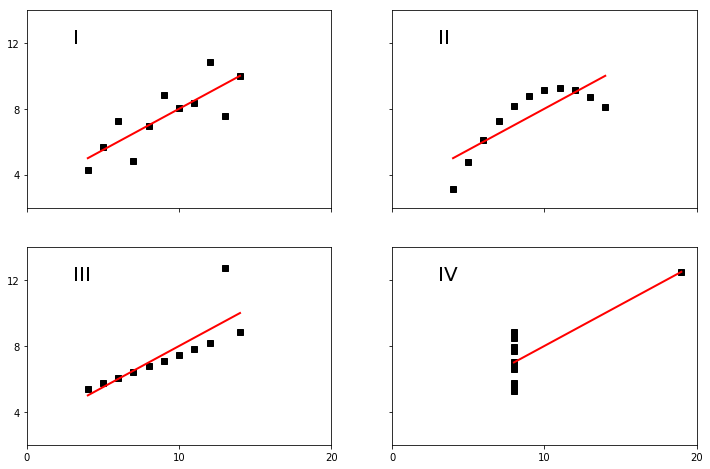

In [13]:
anscombe()

## correlation

<img src="correlation.svg" width=800 />

## distributions

* useful for modeling
* can help constrain thinking on probability questions

* useful thoughts:
    * Is data discrete or continuous?
    * Is data symmetric?
    * What limits are there on possible values for the data?
    * How likely are extreme values?

## common distributions

* Bernoulli
* binomial
* geometric
* Poisson
* exponential
* uniform
* Gaussian
* t-distribution

## Bernoulli:

pmf = $P[success] = p \text{ , }  P[failure] = 1-p $

mean: $ E[x] = p $

variance: $ Var(x) = p(1-p) $

In [14]:
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def plot_pmf(dist, x):
    plt.scatter(x, dist.pmf(x))
    plt.vlines(x, 0, dist.pmf(x))
    plt.ylim(ymin=0)
    plt.xlabel('x')
    plt.ylabel('P(x)')

def plot_pdf(dist, x):
    plt.plot(x, dist.pdf(x))
    plt.ylim(ymin=0)
    plt.xlabel('x')
    plt.ylabel('pdf')

## binomial:  probability of k successes in n trials
pmf: $P[X=k] = {n \choose k}p^k(1-p)^{n-k}, \forall k \in \{0, 1,..., n\} $

mean: $np$

var: $np(1-p)$


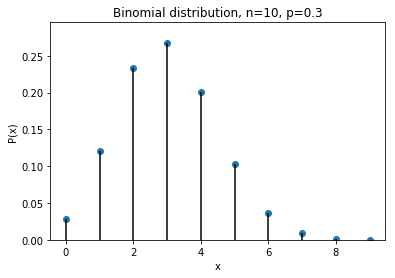

In [16]:
n, p = (10, 0.3)
binom = scs.distributions.binom(n,p)
x = np.arange(0, 10, 1)
plot_pmf(binom, x)
plt.title('Binomial distribution, n={}, p={}'.format(n,p));

In [17]:
binom.cdf(4)

0.84973166739999995

## geometric:  probability of (k-1) failures, then a success
pmf: $ P[X=k] = p (1-p)^{k-1}, \forall k \in \{1, 2,...\}$

mean: $ \frac{1}{p} $

variance: $ \frac{1-p}{p^2} $

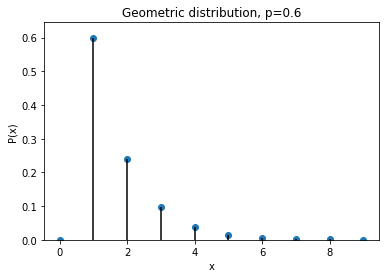

In [18]:
p = 0.6
geom = scs.distributions.geom(p)
x = np.arange(0, 10, 1)
plot_pmf(geom, x)
plt.title('Geometric distribution, p={}'.format(p));

## Poisson: probability of k occurrences in a fixed time interval

pmf: $P[X=k] = \frac{\lambda^k e^{-\lambda}}{k!},\forall k \in \{0,1,2,...\}$

mean: $\lambda $

variance: $ \lambda $

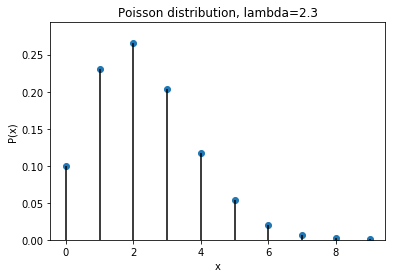

In [19]:
lam = 2.3
pois = scs.distributions.poisson(lam)
x = np.arange(0, 10, 1)
plot_pmf(pois, x)
plt.title('Poisson distribution, lambda={}'.format(lam));

## uniform (discrete): equal probability of generating an integer between $a$ and $b$ (inclusive)

pmf: $ P[X=k] = \frac{1}{b-a + 1}, \forall k\in[a, b], \text{0 otherwise} $

mean: $ \frac{a+b}{2} $

variance: $ \frac{(b-a+1)^2 - 1}{12}$

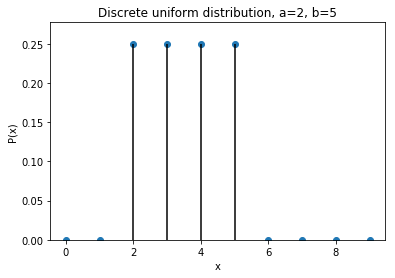

In [20]:
a, b = (2, 5)
unif_d = scs.randint(a,b+1)
x = np.arange(0, 10, 1)
plot_pmf(unif_d, x)
plt.title('Discrete uniform distribution, a={}, b={}'.format(a,b));

## uniform (continuous): equal probability of drawing any real number between $a$ and $b$ (inclusive)

pdf: $ f(x) = \frac{1}{b-a}, \forall x\in[a, b], \text{0 otherwise} $

mean: $ \frac{a+b}{2} $

variance: $ \frac{(b-a)^2}{12}$

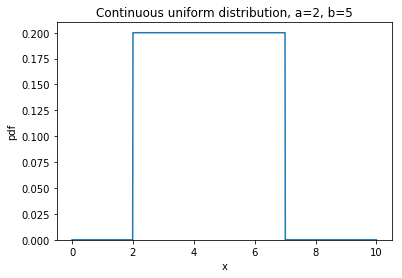

In [21]:
a, b = (2, 5)
unif = scs.distributions.uniform(a,b)
x = np.linspace(0, 10, 1000)
plot_pdf(unif, x)
plt.title('Continuous uniform distribution, a={}, b={}'.format(a,b));

## exponential: distribution of "wait time until event happens"

cdf: $ P[T < t] = 1 - e^{-\lambda t}, x \ge 0, \lambda \ge 0 $

pdf: $ f(t) = \lambda e^{-\lambda t} $

mean: $ \frac{1}{\lambda} $

variance: $ \frac{1}{\lambda^2} $

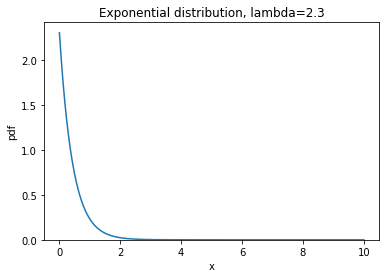

In [22]:
lam_e = 2.3
expo = scs.distributions.expon(scale=1./lam_e)
x = np.linspace(0, 10, 1000)
plot_pdf(expo, x)
plt.title('Exponential distribution, lambda={}'.format(lam_e));

## Gaussian

(also called normal)

pdf: $f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - \mu)^2}{2\sigma^2}} $

mean: $\mu$

variance: $ \sigma^2 $

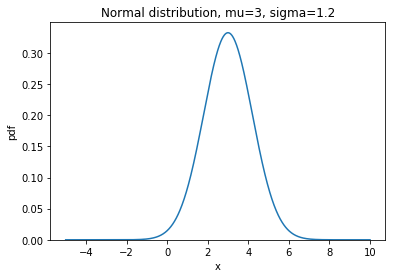

In [23]:
mu, sig = 3, 1.2
normal = scs.distributions.norm(mu, sig)
x = np.linspace(-5, 10, 1000)
plot_pdf(normal, x)
plt.title('Normal distribution, mu={}, sigma={}'.format(mu, sig));

## students-t

pdf: $f(x) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\nu\pi}\Gamma(\frac{\nu}{2})}(1+\frac{x^2}{\nu})^{-\frac{\nu+1}{2}}$  
$\nu$ is degrees of freedom
mean: 0  
variance: $\frac{\nu}{\nu-2}$ for $\nu \gt 2$, $\infty$ for $1 \lt \nu \le 2$, otherwise undefined

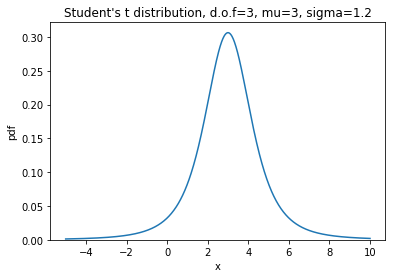

In [24]:
degrees_of_freedom, mu, sig = 3, 3, 1.2
student_t = scs.distributions.t(degrees_of_freedom, mu, sig)
x = np.linspace(-5, 10, 1000)
plot_pdf(student_t, x)
plt.title("Student's t distribution, d.o.f={}, mu={}, sigma={}".format(degrees_of_freedom, mu, sig));

## gamma: kinda like the normal but for strictly non-negative things

pdf: $ f(x) = \frac{\theta^k x^{k-1} e^{-\theta x}}{\Gamma(k)}, x \gt 0$

mean: $k\theta$

variance: $k \theta^2$

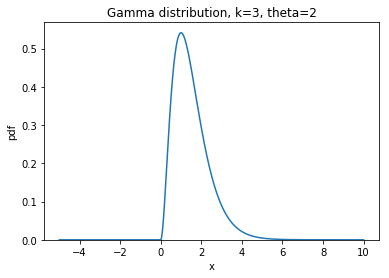

In [25]:
k, theta = 3,2
gamma = scs.distributions.gamma(k, scale=1./theta)
x = np.linspace(-5, 10, 1000)
plot_pdf(gamma, x)
plt.title("Gamma distribution, k={}, theta={}".format(k, theta));